<a href="https://colab.research.google.com/github/BriandBlalock/Quantum-Work/blob/master/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


$
 {\bf Problem 1}$ (Quantum Fourier transform)

Let $N=2^n$, $[N]=\{0,\ldots,N-1\}$, and $\omega=e^{2\pi i / N}$ be an $N$th root of unity. The Quantum Fourier transform $F_N$ of size $N$ is 

>>$
F_N = \frac{1}{\sqrt{N}} \sum_{k,\ell\in[N]} \omega^{k\cdot \ell} |k\rangle\langle\ell|\,.
$

Show that $F_N$ is unitary.

>>$
\alpha = e^{-2\pi i /N}
$


>>$
F_N^\dagger = \frac{1}{\sqrt{N}} \sum_{k,\ell\in[N]} \alpha^{k\cdot \ell} |\ell\rangle\langle k|\,.
$

If $F_N$ is unitary then $F_N^{\dagger}F_N = I$


>>$
F_N^{\dagger}F_N = \left(\frac{1}{\sqrt{N}} \sum_{k,\ell\in[N]} \omega^{k\cdot \ell} |k\rangle\langle\ell| \right) \left(\frac{1}{\sqrt{N}} \sum_{k,\ell\in[N]} \alpha^{k\cdot \ell} |\ell\rangle\langle k|\right)
$

>>$
F_N^{\dagger}F_N = \frac{1}{N} \sum_{k,\ell\in[N]} \omega^{k\cdot \ell}\alpha^{k\cdot \ell}  |\ell\rangle\langle k|k\rangle\langle \ell|
$

>>$
F_N^{\dagger}F_N = \frac{1}{N} \sum_{\ell\in[N]} |\ell\rangle\langle\ell|\equiv I
$



$
{\bf Problem \, 2}$ (Quantum Phase Estimation)

First import necessary packages and setup some constants

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cmath as c
import numpy.linalg as la
from sklearn.preprocessing import normalize
from mpl_toolkits.mplot3d import Axes3D

ket0 = np.array([[1],[0]])
ket1 = np.array([[0],[1]])

np.set_printoptions(precision=2, suppress=True)


Here is the implementation of 

>>$|\varphi\rangle = \bigotimes_{k=n-1,\ldots,0} \frac{1}{\sqrt{2}} \left(  |0\rangle + \exp(2\pi i 2^k \varphi) |1\rangle \right) \,.$

In [0]:

def phiFunct(phi , n):

    ketphi = np.array([])
    for k in range(n-1,-1, -1):

        val = (1/(c.sqrt(2))) *(ket0 + c.exp(2 * c.pi * 1j * (2**k) * phi) * ket1)
        if( not ketphi.any()):
            ketphi = val
        else:
            ketphi = np.kron(ketphi, val)


    return ketphi

This function calculates 

>>>$F_N^\dagger |\varphi\rangle$

for any $\textit{n}$

In [0]:
def fourierDagger(n,ket):

    FnD = np.array([[]])
    N = 2**n
    omega = c.exp(-2 * c.pi * 1j / N)
    for k in range(0,N):

        ketk = np.zeros(N)
        ketk[k] =1

        for l in range(0,N) :
            ketl = np.zeros(N)
            ketl[l] =1
            bral =   np.asmatrix(ketl).getH()

            val = omega**(k*l) * np.kron(bral, ketk)

            if( not FnD.any() ):
                FnD = val
            else:
                FnD += val



    FnD *= 1/(c.sqrt(N))
    return np.matmul(   FnD, ket)


Here is the function I use to graph the results

In [0]:
def display(ket, n,p):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ket = np.around(ket, decimals=1)

    ket = np.absolute(ket)
    #Ndecimals = 1
    #decade = 10**Ndecimals
    #ket =np.trunc(ket*decade)/decade
    ket = normalize(ket,axis=0, norm='l2')
    #print(ket)
    for i in range(0,2**n) :
        val = np.asscalar(ket[i])
        #print(val)
        ax.scatter(i,val)
    ax.set_xlabel('x')
    ax.set_ylabel('Pr(x)')
    ax.set_title("N = 2^{0} phi = {1}".format(n,p))
    plt.ylim(0,1)
    plt.xlim(0,2**n)
    plt.xticks(np.arange(0,32))

    plt.show()

In [0]:
#@title Enter Data

p = int( input())
p/= 256
n=  int(input())

34
5


These are the step by step caluculations needed to complete the problem.

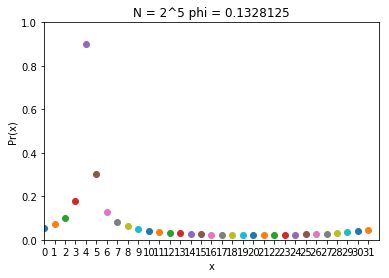

In [0]:

k = phiFunct(p,n)
fnPhi = fourierDagger(n,k)
#print(fnPhi)
display(fnPhi, n,p)